
## DATA SCIENCE INTERNSHIP LET'S GROW MORE

## MORE ADVANCE  LEVEL TASK

## Task 3: ML Facial recognition to detect mood & suggest songs

**Link for the dataset:** https://www.kaggle.com/datasets/msambare/fer2013



In [5]:
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Audio


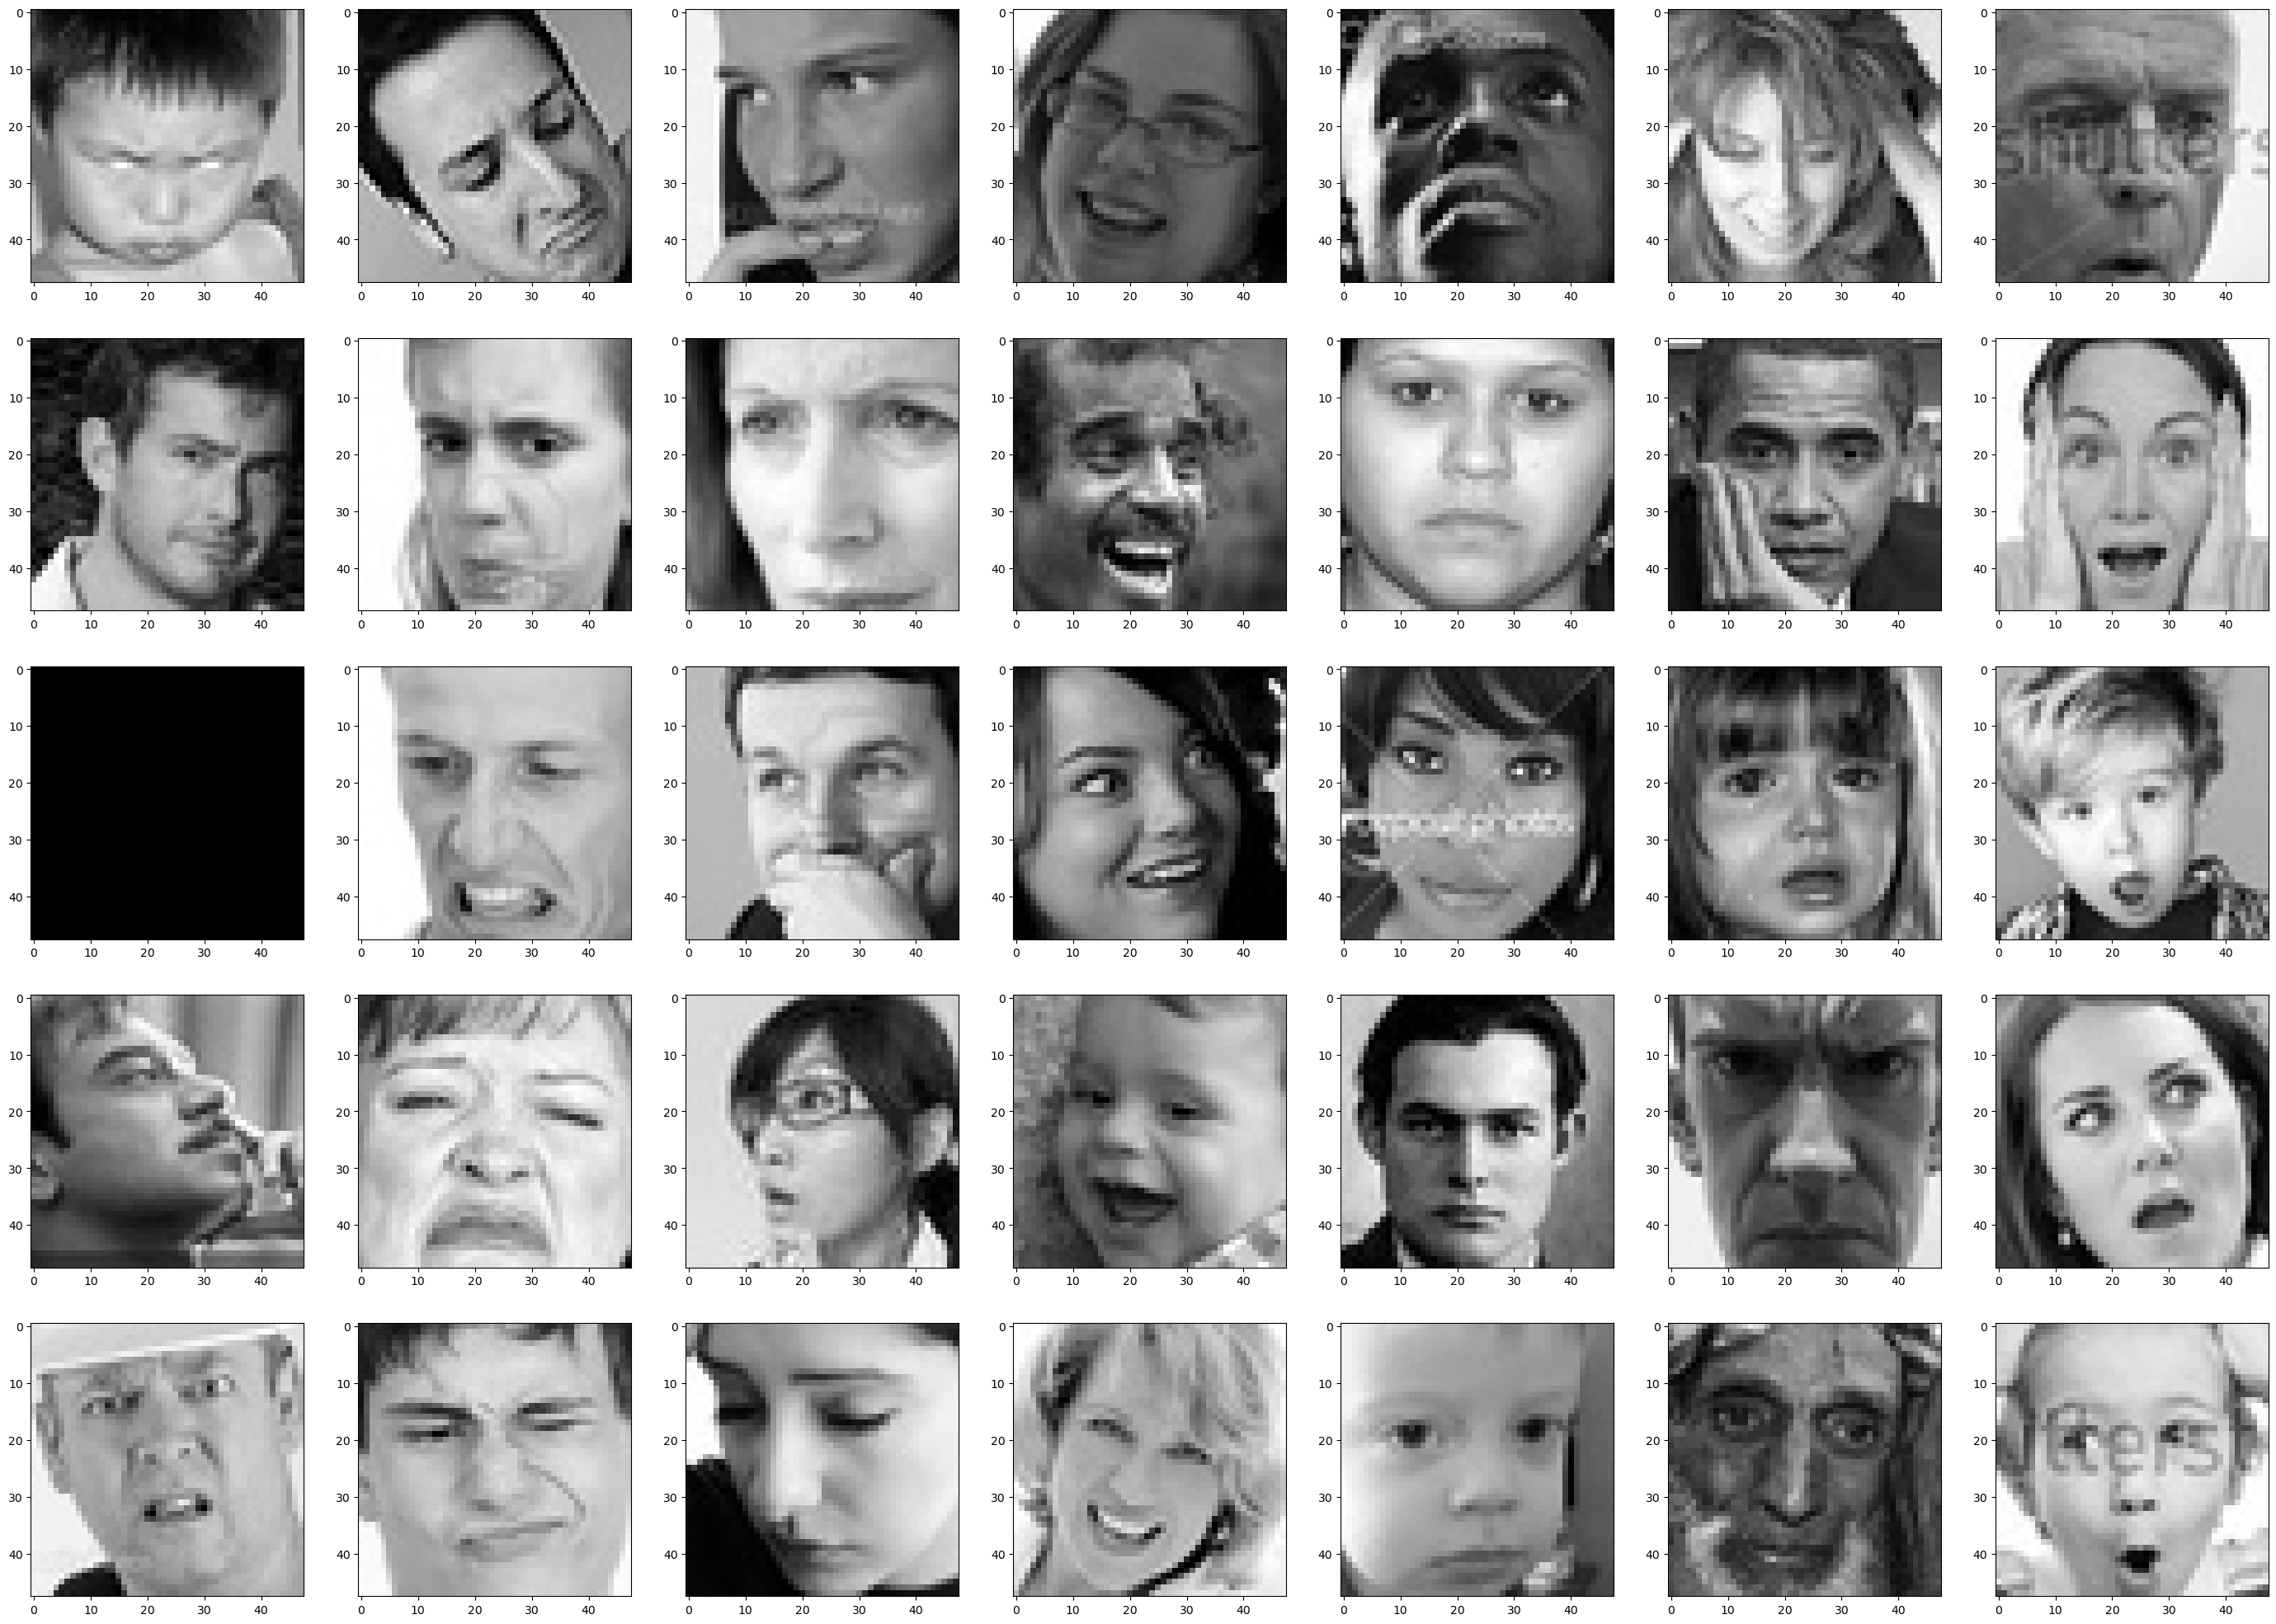

In [2]:
# Data Visualization
from skimage.io import imread
train_dir = "train/"
test_dir = "test/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

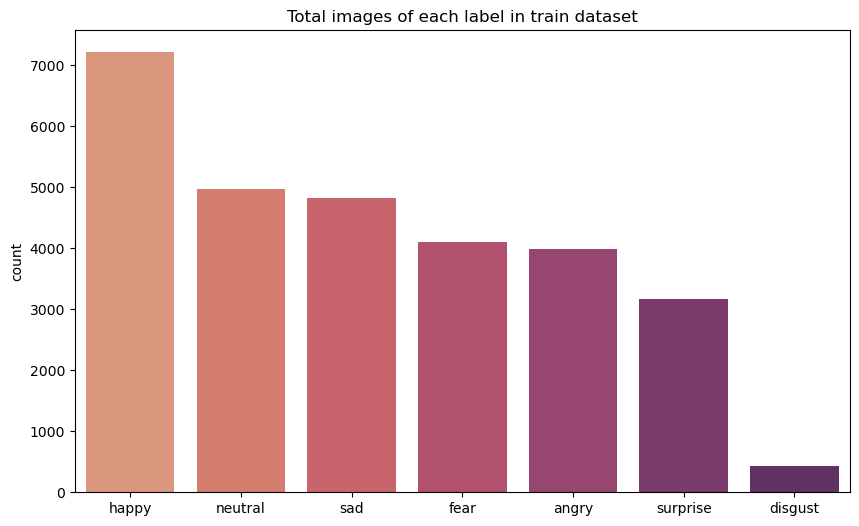

In [3]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

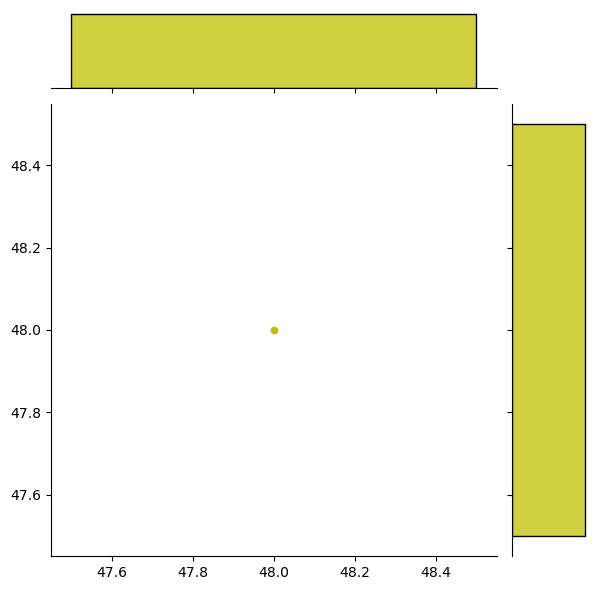

In [5]:
happy = os.listdir(train_dir+'happy/')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
sns.jointplot(dim1, dim2,color='y')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Data Preprocessing
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
# from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

In [11]:
# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [12]:
from tensorflow.keras.optimizers import Adam


In [13]:
# Train the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [15]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 1476s 3s/step - loss: 1.8830 - accuracy: 0.2275 - val_loss: 2.3879 - val_accuracy: 0.2098
Epoch 2/20
448/448 [==============================] - 1081s 2s/step - loss: 1.7995 - accuracy: 0.2535 - val_loss: 1.7708 - val_accuracy: 0.2679
Epoch 3/20
448/448 [==============================] - 1066s 2s/step - loss: 1.7869 - accuracy: 0.2530 - val_loss: 1.7483 - val_accuracy: 0.2840
Epoch 4/20
448/448 [==============================] - 991s 2s/step - loss: 1.7752 - accuracy: 0.2642 - val_loss: 1.7461 - val_accuracy: 0.2893
Epoch 5/20
448/448 [==============================] - 1005s 2s/step - loss: 1.7601 - accuracy: 0.2789 - val_loss: 1.7494 - val_accuracy: 0.3059
Epoch 6/20
448/448 [==============================] - 973s 2s/step - loss: 1.7390 - accuracy: 0.2898 - val_loss: 1.6341 - val_accuracy: 0.3450
Epoch 7/20
448/448 [==============================] - 921s 2s/step - loss: 1.7130 - accuracy: 0.3056 - val_loss: 1.6374 - val_accuracy: 0.

In [16]:
model.save("model.h5")

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 40s 347ms/step - loss: 1.2270 - accuracy: 0.5294
validation accuracy : 52.93954014778137%
validation loss : 1.227014422416687


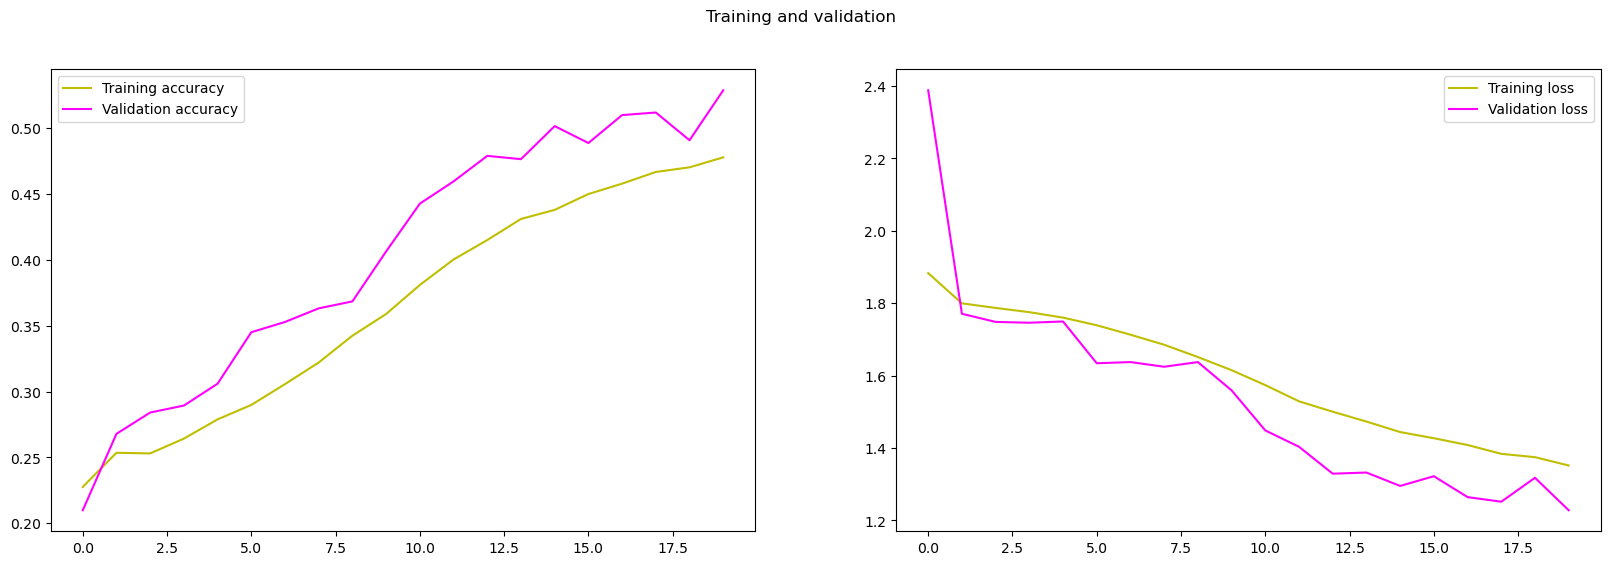

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

113/113 [==============================] - 40s 343ms/step
              precision    recall  f1-score   support

       angry       0.38      0.51      0.44       958
     disgust       0.00      0.00      0.00       111
        fear       0.28      0.26      0.27      1024
       happy       0.84      0.77      0.80      1774
     neutral       0.50      0.47      0.48      1233
         sad       0.39      0.42      0.40      1247
    surprise       0.69      0.70      0.69       831

    accuracy                           0.53      7178
   macro avg       0.44      0.45      0.44      7178
weighted avg       0.53      0.53      0.53      7178





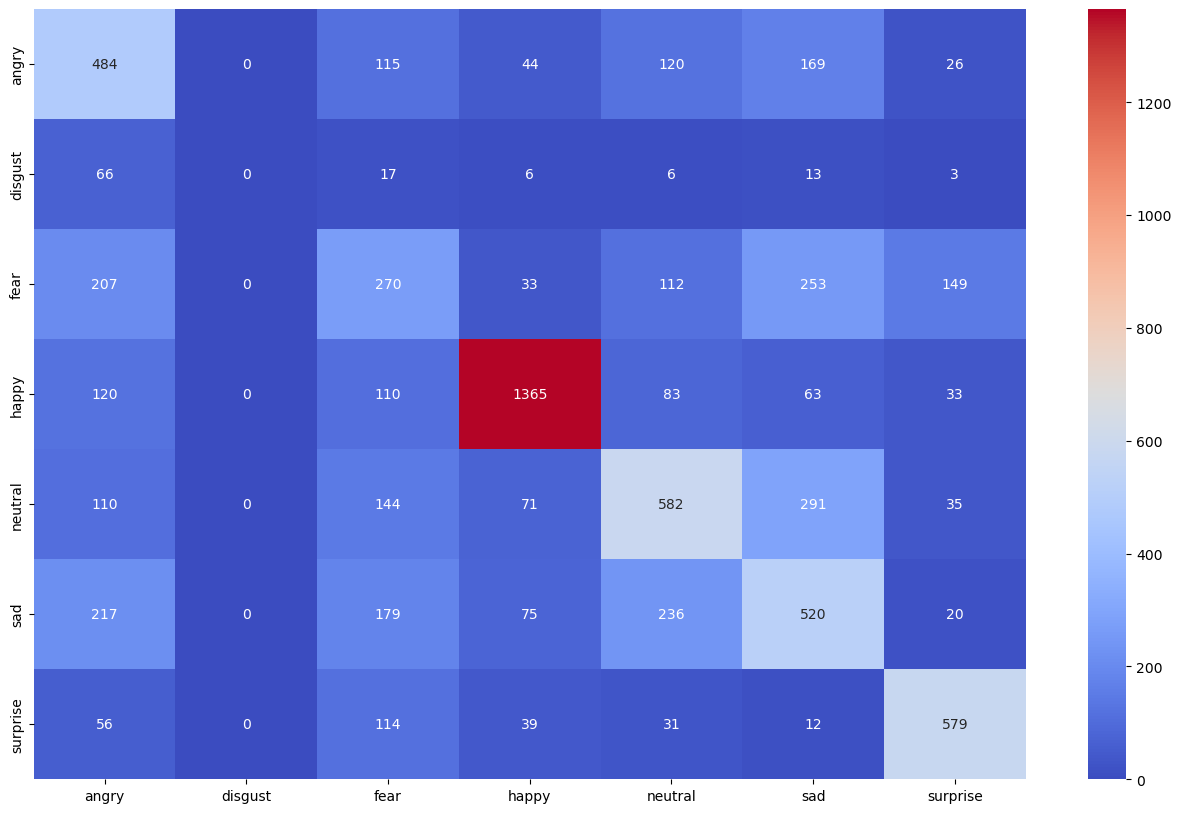

In [19]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

In [29]:
!pip install mtcnn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.3/2.3 MB 4.2 MB/s eta 0:00:00


In [2]:
from mtcnn import MTCNN  # helps in detecting faces from image
from tensorflow.keras.models import load_model


In [3]:
model = load_model('model.h5')
print('Model Loaded 100%')

Model Loaded 100%


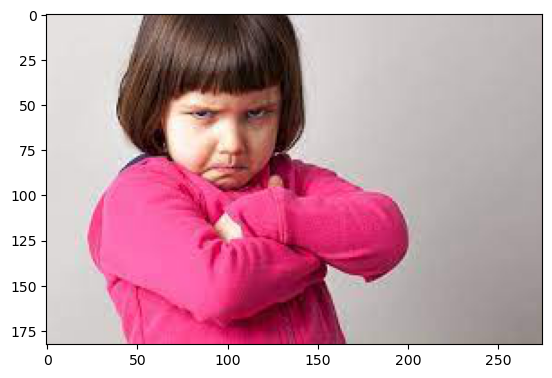

In [6]:
img = 'angry.jpeg'
try:
    image = plt.imread(img)
except SyntaxError:
    image = plt.imread(img, format='jpg')
plt.imshow(image)

1/1 [==============================] - 0s 141ms/step


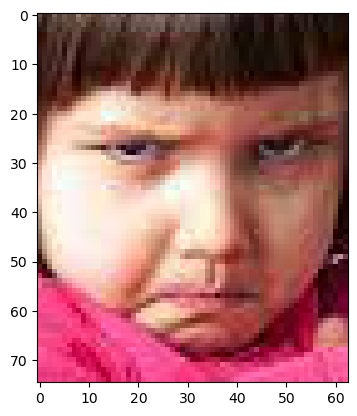

In [7]:
detect = MTCNN()
results = detect.detect_faces(image)

x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

face = image[y1:y2, x1:x2]
plt.imshow(face)

In [8]:
test_image = np.resize(face, (48,48,1))

In [9]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

test_img = np.expand_dims(test_image, axis = 0)
test_img = test_img.reshape(-1,48,48,1)
result = model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
emotion = label_dict[img_index]
print(emotion)

1/1 [==============================] - 0s 117ms/step
Angry


In [10]:
# Song Recommdation
if (emotion=='Angry'):
    path="song\\Angry\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Angry\\'+ d,autoplay=True)
    display(audio)
    
elif (emotion=='Disgust'):
    path="song\\Disgust\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Disgust\\'+ d,autoplay=True)
    display(audio)
    
elif (emotion=="Happy"):
    path="song\\Happy\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Happy\\'+ d,autoplay=True)
    display(audio)
    
elif (emotion=='Sad'):
    path="song\\Sad\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Sad\\'+ d,autoplay=True)
    display(audio)
    
elif (emotion=='Surprise'):
    path="song\\Surprise\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Surprise\\'+ d,autoplay=True)
    display(audio)
    
elif (emotion=='Neutral'):
    path="song\\Neutral\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Neutral\\'+ d,autoplay=True)
    display(audio)

Now Playing: Angry Mood Off-BGM.mp3
